In [1]:
import pandas as pd  # 读写表格以及表格处理
import numpy as np  # 用于数据计算
import matplotlib.ticker as ticker
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")
plt.rc('font', family='Times New Roman')
from glob import glob
from osgeo import gdal, gdal_array, gdalnumeric

In [3]:
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
# 设置全局字体大小
plt.rcParams.update({'font.size': 16})  # 这里的12是你要设置的字体大小

In [4]:
def load_data(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"加载数据时发生错误: {e}")
        return None

def fit_ols_model(a, b):
    return sm.OLS(b, sm.add_constant(a)).fit().rsquared

if __name__ == "__main__":
    df1 = load_data(r"I:\Analysis\Python_code\results\related_rank300_1.csv")
    
    if df1 is not None:
        a = df1['age']
        b_columns =['PCBP1', 'CLEC12A', 'PCBP2', 'DUSP6', 'MNDA', 'TXNIP', 'NAP1L1', 'EIF3E', 'NBPF14', 'SNX3', 'KLF6', 'FOS', 'CALM2', 'ACTR3', 'ACTR2', 'KLF4', 'EIF2S3', 'AP1S2', 'DYNLL1', 'CYBB', 'CDC42', 'XRN2', 'HMGB1', 'RSRP1', 'CD36', 'MEF2C', 'CANX', 'HNRNPA2B1', 'N4BP2L2', 'HNRNPU', 'NBPF10', 'ELF1', 'DDX17', 'PNRC1', 'SDCBP', 'SKP1', 'PTPRC', 'CAPZA2', 'CLEC4A', 'ARPC5', 'CAPZA1', 'SET', 'CD48', 'KHDRBS1', 'SFPQ', 'RGS18', 'BTG1', 'CD164', 'RTN4', 'FOSB', '7-Sep', 'ARF6', 'ATP6AP2', 'SRSF11', 'ARL5A', 'TAX1BP1', 'PTGES3', 'VPS35', 'LYST', 'SRP9', 'KCTD12', 'HSP90B1', 'HSD17B11', 'JMJD1C', 'YWHAZ', 'NPM1', 'IFI16', 'P2RY13', 'LAPTM4A', 'SMCHD1', 'CD302', 'AC020656.1', 'LUC7L3', 'ITM2B', 'GABARAPL2', 'RBM3', 'OSTF1', 'YWHAH', 'SRRM1', 'MFSD1', 'TRAM1', 'ACAP2', 'HLA-DRA', 'TTC3', 'HMGN2', 'RAP1A', 'MBNL1', 'BZW1', 'MALAT1', 'KRT10', 'H2AFY', 'PRDX3', 'SELENOF', 'CAT', 'SCP2', 'EVI2B', 'EIF3A', 'FAM96A', 'RAP2B', 'OSTC', 'HMGN1', 'RBM39', 'HSP90AB1', 'ATRX', 'SPTSSA', 'ARL6IP5', 'EMB', 'MIS18BP1', 'FNTA', 'UBE2J1', 'NKTR', 'ABRACL', 'MYADM', 'TTC14', 'EIF4B', 'SCAF11', 'ERH', 'TMEM50A', 'SKAP2', 'CPNE3', 'ECHDC1', 'CNIH1', 'TMEM123', 'RSL1D1', '1-Mar', 'SHOC2', 'EIF4A2', 'METTL9', 'HSP90AA1', 'SUMO1', 'STK4', 'GPBP1', 'CPVL', 'PCF11', 'SYNCRIP', 'WASHC4', 'UVRAG', 'CELF2', 'DAPP1', 'GLIPR1', 'GLUD1', 'ASH1L', 'ANXA5', 'TMEM154', 'CEP350', 'SUMO2', 'CITED2', 'RBBP4', 'SEC61G', 'UFM1', 'SNAP23', 'LYN', 'SNX10', 'SSR1', 'ATP5MPL', 'RSL24D1', 'STX7', 'SGK1', 'PTBP3', 'EIF1B', 'ATP6V1G1', 'CSDE1', 'WDFY2', 'ATM', 'CHD9', 'YBEY', 'NRBF2', 'YBX1', 'CYBA', 'CMPK1', 'SHTN1', 'GPR65', 'TAF7', 'ZNF207', 'GAPT', 'LAMTOR3', 'TOMM20', 'HNRNPH1', 'SRSF2', 'SRGN', 'COMMD8', 'OCIAD1', 'TNFAIP8', 'APPL1', 'ANKRD44', 'PAPOLA', 'GDI2', 'VMP1', 'PPP1CC', 'MOB1A', '2-Sep', 'KTN1', 'LSM6', 'TNRC6B', 'HDAC2', 'ARF4', 'EIF3M', 'MDM4', 'SMIM14', 'POLR2J3.1', 'CD180', 'DICER1', 'BICD2', 'BCLAF1', 'LYPLA1', 'GTF2A2', 'PPP1R2', 'PTP4A2', 'SARAF', 'EVI2A', 'PPP6C', 'NCL', 'PLXDC2', 'PRPF38B', 'TMEM165', 'KIAA1551', 'NBPF19', 'HNRNPA3', 'TNKS2', 'CD53', 'SLC40A1', 'ITGB1', 'ESD', 'RNASE6', 'LSM14A', 'IFNGR1', 'RNMT', 'CTSS', 'RAB32', 'NIPSNAP3A', 'ITSN2', 'TMED10', 'RBL2', 'SRSF9', 'NIPBL', 'HSPD1', 'PDCD10', 'TMCO1', 'ME2', 'PBRM1', 'ADD3', 'EIF1AX', 'GOLPH3', 'HDAC9', 'SETX', 'SNX6', 'MORF4L1', 'RAP1B', 'RNPEP', 'CD46', 'SENP6', 'TERF2IP', 'LITAF', 'CD86', 'RHEB', 'TLE4', 'PHF20L1', 'PPIP5K2', 'TMEM243', 'NR3C1', 'CCNL1', 'ARID1B', 'SNRPE', 'SS18L2', 'ZRANB2', 'THOC2', 'PDIA6', 'MAT2A', 'OSBPL8', 'KRCC1', 'C9orf72', 'PSMA4', 'RANBP1', 'HNRNPR', 'HNRNPF', 'SCPEP1', 'TSC22D3', 'SPCS1', 'DHX36', 'STAG2', 'TMEM230', 'C1D', 'AHR', 'PPP4R3A', 'UBE3A', 'AP3B1', 'CCNI', 'MYL12A', 'YIPF4', 'COPB1', 'MAT2B', 'BPTF', 'IL13RA1', 'BIRC6', 'RTN3', 'MEAF6', 'UBXN4', 'CUL5', 'EPC1', 'TMEM167A']  # 列名列表
        results = {col: fit_ols_model(a, df1[col]) for col in b_columns if col in df1.columns}
        
        for col, r_squared in results.items():
            print(f"列 '{col}' 与 'age' 的 R-squared 值: {r_squared:.4f}")       
results_df = pd.DataFrame(list(results.items()), columns=['Column', 'R-squared'])
        
# 输出到 Excel 文件
output_file_path = r"I:\Analysis\Python_code\results\ols_results.xlsx"
results_df.to_excel(output_file_path, index=False)
print(f"结果已成功输出到 Excel 文件: {output_file_path}")

列 'PCBP1' 与 'age' 的 R-squared 值: 0.3058
列 'CLEC12A' 与 'age' 的 R-squared 值: 0.1325
列 'PCBP2' 与 'age' 的 R-squared 值: 0.2787
列 'DUSP6' 与 'age' 的 R-squared 值: 0.1844
列 'MNDA' 与 'age' 的 R-squared 值: 0.2543
列 'TXNIP' 与 'age' 的 R-squared 值: 0.2374
列 'NAP1L1' 与 'age' 的 R-squared 值: 0.6705
列 'EIF3E' 与 'age' 的 R-squared 值: 0.3587
列 'NBPF14' 与 'age' 的 R-squared 值: 0.4112
列 'SNX3' 与 'age' 的 R-squared 值: 0.3653
列 'KLF6' 与 'age' 的 R-squared 值: 0.0720
列 'FOS' 与 'age' 的 R-squared 值: 0.0704
列 'CALM2' 与 'age' 的 R-squared 值: 0.1530
列 'ACTR3' 与 'age' 的 R-squared 值: 0.2746
列 'ACTR2' 与 'age' 的 R-squared 值: 0.3706
列 'KLF4' 与 'age' 的 R-squared 值: 0.3295
列 'EIF2S3' 与 'age' 的 R-squared 值: 0.4211
列 'AP1S2' 与 'age' 的 R-squared 值: 0.1749
列 'DYNLL1' 与 'age' 的 R-squared 值: 0.1825
列 'CYBB' 与 'age' 的 R-squared 值: 0.3557
列 'CDC42' 与 'age' 的 R-squared 值: 0.3848
列 'XRN2' 与 'age' 的 R-squared 值: 0.3119
列 'HMGB1' 与 'age' 的 R-squared 值: 0.2124
列 'RSRP1' 与 'age' 的 R-squared 值: 0.1981
列 'CD36' 与 'age' 的 R-squared 值: 0.2554
列 '

In [7]:
def load_data(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"加载数据时发生错误: {e}")
        return None

def fit_ols_model(a, b):
    return sm.OLS(b, sm.add_constant(a)).fit().rsquared

if __name__ == "__main__":
    df1 = load_data(r"I:\Analysis\Python_code\results\related_rank300_1.csv")
    
    if df1 is not None:
        age = df1['age']
        another_metric = df1['SASP']  # 这里请替换为您的真实指标名称
        
        b_columns = ['PCBP1', 'CLEC12A', 'PCBP2', 'DUSP6', 'MNDA', 'TXNIP', 'NAP1L1', 'EIF3E', 'NBPF14', 'SNX3', 'KLF6', 'FOS', 'CALM2', 'ACTR3', 'ACTR2', 'KLF4', 'EIF2S3', 'AP1S2', 'DYNLL1', 'CYBB', 'CDC42', 'XRN2', 'HMGB1', 'RSRP1', 'CD36', 'MEF2C', 'CANX', 'HNRNPA2B1', 'N4BP2L2', 'HNRNPU', 'NBPF10', 'ELF1', 'DDX17', 'PNRC1', 'SDCBP', 'SKP1', 'PTPRC', 'CAPZA2', 'CLEC4A', 'ARPC5', 'CAPZA1', 'SET', 'CD48', 'KHDRBS1', 'SFPQ', 'RGS18', 'BTG1', 'CD164', 'RTN4', 'FOSB', '7-Sep', 'ARF6', 'ATP6AP2', 'SRSF11', 'ARL5A', 'TAX1BP1', 'PTGES3', 'VPS35', 'LYST', 'SRP9', 'KCTD12', 'HSP90B1', 'HSD17B11', 'JMJD1C', 'YWHAZ', 'NPM1', 'IFI16', 'P2RY13', 'LAPTM4A', 'SMCHD1', 'CD302', 'AC020656.1', 'LUC7L3', 'ITM2B', 'GABARAPL2', 'RBM3', 'OSTF1', 'YWHAH', 'SRRM1', 'MFSD1', 'TRAM1', 'ACAP2', 'HLA-DRA', 'TTC3', 'HMGN2', 'RAP1A', 'MBNL1', 'BZW1', 'MALAT1', 'KRT10', 'H2AFY', 'PRDX3', 'SELENOF', 'CAT', 'SCP2', 'EVI2B', 'EIF3A', 'FAM96A', 'RAP2B', 'OSTC', 'HMGN1', 'RBM39', 'HSP90AB1', 'ATRX', 'SPTSSA', 'ARL6IP5', 'EMB', 'MIS18BP1', 'FNTA', 'UBE2J1', 'NKTR', 'ABRACL', 'MYADM', 'TTC14', 'EIF4B', 'SCAF11', 'ERH', 'TMEM50A', 'SKAP2', 'CPNE3', 'ECHDC1', 'CNIH1', 'TMEM123', 'RSL1D1', '1-Mar', 'SHOC2', 'EIF4A2', 'METTL9', 'HSP90AA1', 'SUMO1', 'STK4', 'GPBP1', 'CPVL', 'PCF11', 'SYNCRIP', 'WASHC4', 'UVRAG', 'CELF2', 'DAPP1', 'GLIPR1', 'GLUD1', 'ASH1L', 'ANXA5', 'TMEM154', 'CEP350', 'SUMO2', 'CITED2', 'RBBP4', 'SEC61G', 'UFM1', 'SNAP23', 'LYN', 'SNX10', 'SSR1', 'ATP5MPL', 'RSL24D1', 'STX7', 'SGK1', 'PTBP3', 'EIF1B', 'ATP6V1G1', 'CSDE1', 'WDFY2', 'ATM', 'CHD9', 'YBEY', 'NRBF2', 'YBX1', 'CYBA', 'CMPK1', 'SHTN1', 'GPR65', 'TAF7', 'ZNF207', 'GAPT', 'LAMTOR3', 'TOMM20', 'HNRNPH1', 'SRSF2', 'SRGN', 'COMMD8', 'OCIAD1', 'TNFAIP8', 'APPL1', 'ANKRD44', 'PAPOLA', 'GDI2', 'VMP1', 'PPP1CC', 'MOB1A', '2-Sep', 'KTN1', 'LSM6', 'TNRC6B', 'HDAC2', 'ARF4', 'EIF3M', 'MDM4', 'SMIM14', 'POLR2J3.1', 'CD180', 'DICER1', 'BICD2', 'BCLAF1', 'LYPLA1', 'GTF2A2', 'PPP1R2', 'PTP4A2', 'SARAF', 'EVI2A', 'PPP6C', 'NCL', 'PLXDC2', 'PRPF38B', 'TMEM165', 'KIAA1551', 'NBPF19', 'HNRNPA3', 'TNKS2', 'CD53', 'SLC40A1', 'ITGB1', 'ESD', 'RNASE6', 'LSM14A', 'IFNGR1', 'RNMT', 'CTSS', 'RAB32', 'NIPSNAP3A', 'ITSN2', 'TMED10', 'RBL2', 'SRSF9', 'NIPBL', 'HSPD1', 'PDCD10', 'TMCO1', 'ME2', 'PBRM1', 'ADD3', 'EIF1AX', 'GOLPH3', 'HDAC9', 'SETX', 'SNX6', 'MORF4L1', 'RAP1B', 'RNPEP', 'CD46', 'SENP6', 'TERF2IP', 'LITAF', 'CD86', 'RHEB', 'TLE4', 'PHF20L1', 'PPIP5K2', 'TMEM243', 'NR3C1', 'CCNL1', 'ARID1B', 'SNRPE', 'SS18L2', 'ZRANB2', 'THOC2', 'PDIA6', 'MAT2A', 'OSBPL8', 'KRCC1', 'C9orf72', 'PSMA4', 'RANBP1', 'HNRNPR', 'HNRNPF', 'SCPEP1', 'TSC22D3', 'SPCS1', 'DHX36', 'STAG2', 'TMEM230', 'C1D', 'AHR', 'PPP4R3A', 'UBE3A', 'AP3B1', 'CCNI', 'MYL12A', 'YIPF4', 'COPB1', 'MAT2B', 'BPTF', 'IL13RA1', 'BIRC6', 'RTN3', 'MEAF6', 'UBXN4', 'CUL5', 'EPC1', 'TMEM167A']  # 列名列表
        
        results_age = {col: fit_ols_model(age, df1[col]) for col in b_columns if col in df1.columns}
        results_metric = {col: fit_ols_model(another_metric, df1[col]) for col in b_columns if col in df1.columns}

        # 打印结果
        print("与 'age' 的 R-squared 值:")
        for col, r_squared in results_age.items():
            print(f"列 '{col}' 与 'age' 的 R-squared 值: {r_squared:.4f}")

        print("\n与 'another_metric' 的 R-squared 值:")
        for col, r_squared in results_metric.items():
            print(f"列 '{col}' 与 'another_metric' 的 R-squared 值: {r_squared:.4f}")

        # 将结果保存到 DataFrame
        results_df_age = pd.DataFrame(list(results_age.items()), columns=['Column', 'R-squared (age)'])
        results_df_metric = pd.DataFrame(list(results_metric.items()), columns=['Column', 'R-squared (another_metric)'])
        
        # 合并结果
        merged_results = pd.merge(results_df_age, results_df_metric, on='Column', how='outer')
        
        # 输出到 Excel 文件
        output_file_path = r"I:\Analysis\Python_code\results\ols_results.xlsx"
        merged_results.to_excel(output_file_path, index=False)
        print(f"结果已成功输出到 Excel 文件: {output_file_path}")

与 'age' 的 R-squared 值:
列 'PCBP1' 与 'age' 的 R-squared 值: 0.3058
列 'CLEC12A' 与 'age' 的 R-squared 值: 0.1325
列 'PCBP2' 与 'age' 的 R-squared 值: 0.2787
列 'DUSP6' 与 'age' 的 R-squared 值: 0.1844
列 'MNDA' 与 'age' 的 R-squared 值: 0.2543
列 'TXNIP' 与 'age' 的 R-squared 值: 0.2374
列 'NAP1L1' 与 'age' 的 R-squared 值: 0.6705
列 'EIF3E' 与 'age' 的 R-squared 值: 0.3587
列 'NBPF14' 与 'age' 的 R-squared 值: 0.4112
列 'SNX3' 与 'age' 的 R-squared 值: 0.3653
列 'KLF6' 与 'age' 的 R-squared 值: 0.0720
列 'FOS' 与 'age' 的 R-squared 值: 0.0704
列 'CALM2' 与 'age' 的 R-squared 值: 0.1530
列 'ACTR3' 与 'age' 的 R-squared 值: 0.2746
列 'ACTR2' 与 'age' 的 R-squared 值: 0.3706
列 'KLF4' 与 'age' 的 R-squared 值: 0.3295
列 'EIF2S3' 与 'age' 的 R-squared 值: 0.4211
列 'AP1S2' 与 'age' 的 R-squared 值: 0.1749
列 'DYNLL1' 与 'age' 的 R-squared 值: 0.1825
列 'CYBB' 与 'age' 的 R-squared 值: 0.3557
列 'CDC42' 与 'age' 的 R-squared 值: 0.3848
列 'XRN2' 与 'age' 的 R-squared 值: 0.3119
列 'HMGB1' 与 'age' 的 R-squared 值: 0.2124
列 'RSRP1' 与 'age' 的 R-squared 值: 0.1981
列 'CD36' 与 'age' 的 

In [9]:
import pandas as pd
import statsmodels.api as sm
import os
from datetime import datetime

def load_data(file_path):
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"加载数据时发生错误: {e}")
        return None

def fit_ols_model(a, b):
    model = sm.OLS(b, sm.add_constant(a)).fit()
    return model.rsquared, model.pvalues  # 返回 R-squared 和 p 值

if __name__ == "__main__":
    df1 = load_data(r"I:\Analysis\Python_code\results\related_rank300_1.csv")
    
    if df1 is not None:
        age = df1['age']
        another_metric = df1['SASP']  # 请替换为您的真实指标名称
        
        b_columns = ['PCBP1', 'CLEC12A', 'PCBP2', 'DUSP6', 'MNDA', 'TXNIP', 'NAP1L1', 'EIF3E', 'NBPF14', 'SNX3', 'KLF6', 'FOS', 'CALM2', 'ACTR3', 'ACTR2', 'KLF4', 'EIF2S3', 'AP1S2', 'DYNLL1', 'CYBB', 'CDC42', 'XRN2', 'HMGB1', 'RSRP1', 'CD36', 'MEF2C', 'CANX', 'HNRNPA2B1', 'N4BP2L2', 'HNRNPU', 'NBPF10', 'ELF1', 'DDX17', 'PNRC1', 'SDCBP', 'SKP1', 'PTPRC', 'CAPZA2', 'CLEC4A', 'ARPC5', 'CAPZA1', 'SET', 'CD48', 'KHDRBS1', 'SFPQ', 'RGS18', 'BTG1', 'CD164', 'RTN4', 'FOSB', '7-Sep', 'ARF6', 'ATP6AP2', 'SRSF11', 'ARL5A', 'TAX1BP1', 'PTGES3', 'VPS35', 'LYST', 'SRP9', 'KCTD12', 'HSP90B1', 'HSD17B11', 'JMJD1C', 'YWHAZ', 'NPM1', 'IFI16', 'P2RY13', 'LAPTM4A', 'SMCHD1', 'CD302', 'AC020656.1', 'LUC7L3', 'ITM2B', 'GABARAPL2', 'RBM3', 'OSTF1', 'YWHAH', 'SRRM1', 'MFSD1', 'TRAM1', 'ACAP2', 'HLA-DRA', 'TTC3', 'HMGN2', 'RAP1A', 'MBNL1', 'BZW1', 'MALAT1', 'KRT10', 'H2AFY', 'PRDX3', 'SELENOF', 'CAT', 'SCP2', 'EVI2B', 'EIF3A', 'FAM96A', 'RAP2B', 'OSTC', 'HMGN1', 'RBM39', 'HSP90AB1', 'ATRX', 'SPTSSA', 'ARL6IP5', 'EMB', 'MIS18BP1', 'FNTA', 'UBE2J1', 'NKTR', 'ABRACL', 'MYADM', 'TTC14', 'EIF4B', 'SCAF11', 'ERH', 'TMEM50A', 'SKAP2', 'CPNE3', 'ECHDC1', 'CNIH1', 'TMEM123', 'RSL1D1', '1-Mar', 'SHOC2', 'EIF4A2', 'METTL9', 'HSP90AA1', 'SUMO1', 'STK4', 'GPBP1', 'CPVL', 'PCF11', 'SYNCRIP', 'WASHC4', 'UVRAG', 'CELF2', 'DAPP1', 'GLIPR1', 'GLUD1', 'ASH1L', 'ANXA5', 'TMEM154', 'CEP350', 'SUMO2', 'CITED2', 'RBBP4', 'SEC61G', 'UFM1', 'SNAP23', 'LYN', 'SNX10', 'SSR1', 'ATP5MPL', 'RSL24D1', 'STX7', 'SGK1', 'PTBP3', 'EIF1B', 'ATP6V1G1', 'CSDE1', 'WDFY2', 'ATM', 'CHD9', 'YBEY', 'NRBF2', 'YBX1', 'CYBA', 'CMPK1', 'SHTN1', 'GPR65', 'TAF7', 'ZNF207', 'GAPT', 'LAMTOR3', 'TOMM20', 'HNRNPH1', 'SRSF2', 'SRGN', 'COMMD8', 'OCIAD1', 'TNFAIP8', 'APPL1', 'ANKRD44', 'PAPOLA', 'GDI2', 'VMP1', 'PPP1CC', 'MOB1A', '2-Sep', 'KTN1', 'LSM6', 'TNRC6B', 'HDAC2', 'ARF4', 'EIF3M', 'MDM4', 'SMIM14', 'POLR2J3.1', 'CD180', 'DICER1', 'BICD2', 'BCLAF1', 'LYPLA1', 'GTF2A2', 'PPP1R2', 'PTP4A2', 'SARAF', 'EVI2A', 'PPP6C', 'NCL', 'PLXDC2', 'PRPF38B', 'TMEM165', 'KIAA1551', 'NBPF19', 'HNRNPA3', 'TNKS2', 'CD53', 'SLC40A1', 'ITGB1', 'ESD', 'RNASE6', 'LSM14A', 'IFNGR1', 'RNMT', 'CTSS', 'RAB32', 'NIPSNAP3A', 'ITSN2', 'TMED10', 'RBL2', 'SRSF9', 'NIPBL', 'HSPD1', 'PDCD10', 'TMCO1', 'ME2', 'PBRM1', 'ADD3', 'EIF1AX', 'GOLPH3', 'HDAC9', 'SETX', 'SNX6', 'MORF4L1', 'RAP1B', 'RNPEP', 'CD46', 'SENP6', 'TERF2IP', 'LITAF', 'CD86', 'RHEB', 'TLE4', 'PHF20L1', 'PPIP5K2', 'TMEM243', 'NR3C1', 'CCNL1', 'ARID1B', 'SNRPE', 'SS18L2', 'ZRANB2', 'THOC2', 'PDIA6', 'MAT2A', 'OSBPL8', 'KRCC1', 'C9orf72', 'PSMA4', 'RANBP1', 'HNRNPR', 'HNRNPF', 'SCPEP1', 'TSC22D3', 'SPCS1', 'DHX36', 'STAG2', 'TMEM230', 'C1D', 'AHR', 'PPP4R3A', 'UBE3A', 'AP3B1', 'CCNI', 'MYL12A', 'YIPF4', 'COPB1', 'MAT2B', 'BPTF', 'IL13RA1', 'BIRC6', 'RTN3', 'MEAF6', 'UBXN4', 'CUL5', 'EPC1', 'TMEM167A']  # 列名列表
        
        results_age = {}
        results_metric = {}
        
        for col in b_columns:
            if col in df1.columns:
                r_squared, p_values = fit_ols_model(age, df1[col])
                results_age[col] = {"R-squared": r_squared, "p-value": p_values[1]}  # 获取与 'age' 相关的 p 值
                
                r_squared, p_values = fit_ols_model(another_metric, df1[col])
                results_metric[col] = {"R-squared": r_squared, "p-value": p_values[1]}  # 获取与 'another_metric' 相关的 p 值

        # 打印结果
        print("与 'age' 的分析结果:")
        for col, metrics in results_age.items():
            print(f"列 '{col}' -> R-squared: {metrics['R-squared']:.4f}, p-value: {metrics['p-value']:.4f}")

        print("\n与 'another_metric' 的分析结果:")
        for col, metrics in results_metric.items():
            print(f"列 '{col}' -> R-squared: {metrics['R-squared']:.4f}, p-value: {metrics['p-value']:.4f}")

        # 将结果保存到 DataFrame
        results_df_age = pd.DataFrame.from_dict(results_age, orient='index').reset_index()
        results_df_age.columns = ['Column', 'R-squared (age)', 'p-value (age)']
        
        results_df_metric = pd.DataFrame.from_dict(results_metric, orient='index').reset_index()
        results_df_metric.columns = ['Column', 'R-squared (another_metric)', 'p-value (another_metric)']
        
        # 合并结果
        merged_results = pd.merge(results_df_age, results_df_metric, on='Column', how='outer')
        
        # 输出到 Excel 文件（添加时间戳以避免覆盖）
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        output_file_path = os.path.join(r"I:\Analysis\Python_code\results", f"ols_results_{timestamp}.xlsx")
        merged_results.to_excel(output_file_path, index=False)
        print(f"结果已成功输出到 Excel 文件: {output_file_path}")

与 'age' 的分析结果:
列 'PCBP1' -> R-squared: 0.3058, p-value: 0.0263
列 'CLEC12A' -> R-squared: 0.1325, p-value: 0.1658
列 'PCBP2' -> R-squared: 0.2787, p-value: 0.0355
列 'DUSP6' -> R-squared: 0.1844, p-value: 0.0970
列 'MNDA' -> R-squared: 0.2543, p-value: 0.0464
列 'TXNIP' -> R-squared: 0.2374, p-value: 0.0556
列 'NAP1L1' -> R-squared: 0.6705, p-value: 0.0001
列 'EIF3E' -> R-squared: 0.3587, p-value: 0.0142
列 'NBPF14' -> R-squared: 0.4112, p-value: 0.0074
列 'SNX3' -> R-squared: 0.3653, p-value: 0.0131
列 'KLF6' -> R-squared: 0.0720, p-value: 0.3150
列 'FOS' -> R-squared: 0.0704, p-value: 0.3207
列 'CALM2' -> R-squared: 0.1530, p-value: 0.1341
列 'ACTR3' -> R-squared: 0.2746, p-value: 0.0372
列 'ACTR2' -> R-squared: 0.3706, p-value: 0.0123
列 'KLF4' -> R-squared: 0.3295, p-value: 0.0201
列 'EIF2S3' -> R-squared: 0.4211, p-value: 0.0065
列 'AP1S2' -> R-squared: 0.1749, p-value: 0.1069
列 'DYNLL1' -> R-squared: 0.1825, p-value: 0.0988
列 'CYBB' -> R-squared: 0.3557, p-value: 0.0147
列 'CDC42' -> R-squared: 0.

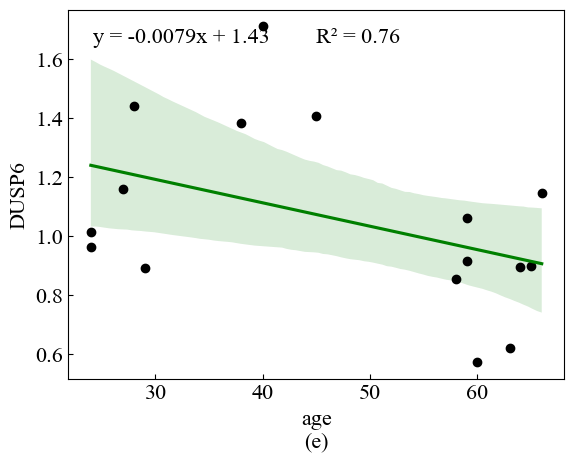

In [57]:
sns.regplot(x="age",y="DUSP6",data=df1,scatter=False,order=1,ci=95,label="Regression Line",color="green")
plt.scatter(a, b, color='black', label='Data Points')
plt.text(0.5, 0.95, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes,  color='black', ha='left', va='top')
plt.tick_params(direction='in')
plt.text(0.5, -0.17, '(e)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
# 使用numpy的polyfit来获取线性回归的系数
slope2, intercept2 = np.polyfit(a, b, 1)
# 构造数学表达式字符串
math_expression = f'y = {slope2:.4f}x + {intercept2:.2f}'
# 在图上添加数学表达式
plt.text(0.05, 0.95, math_expression, transform=plt.gca().transAxes,verticalalignment='top', horizontalalignment='left')
plt.show()

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression